# 1D Convolution

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Let's define two descrete window functions.

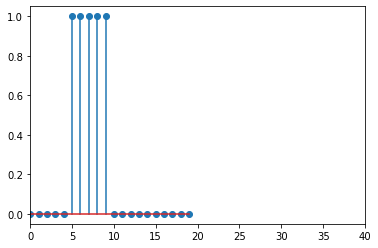

In [154]:
x = np.zeros(20)
x[5:10] = 1
plt.stem(x)
plt.xlim(0,40)
plt.show()

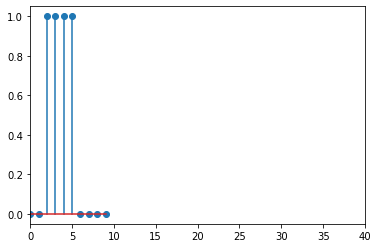

In [155]:
y = np.zeros(10)
y[2:6] = 1 
plt.stem(y)
plt.xlim(0,40)
plt.show()

The convolution using Numpy will be:

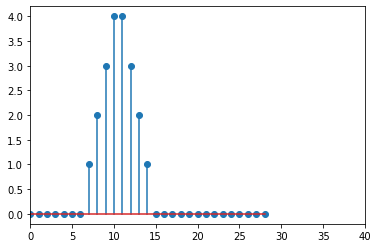

In [156]:
z = np.convolve(x,y)
plt.stem(z)
plt.xlim(0,40)
plt.show()

This is our implementation:

In [157]:
def convolve_1d(x, y):
    ''' 1d convolution: z[n] = sum (x[m] * y[m-n]) 
    Args:
        x : numpy array
        y : numpy arra
    Return:
        z : numpy array
    '''
    Nx = len(x)
    Ny = len(y)

    # always make sure the longer one is x
    if Nx < Ny:
        Nx, Ny = Ny, Nx
        x, y = y, x

    # output    
    Nz = Nx + Ny - 1
    z = np.zeros(Nz)

    # convolution
    y_reversed = y[::-1]
    for n in range(Nz):
        if n < Ny:
            z[n] = sum(x[0:n+1] * y_reversed[Ny-n-1:])
        elif n < Nx:
            z[n] = sum(x[n-Ny+1:n+1] * y_reversed)
        else: 
            z[n] = sum(x[n-Ny:Nx-1] * y_reversed[0:Nx+Ny-n-1])
    return z
    

Show output:

In [158]:
z = convolve_1d(x, y)
plt.stem(z)
plt.xlim(0,40)
plt.show()